## 테이블의 내용은 아래의 내용을 담고 있습니다.
1. 고객이 각 귀속년도별
1. 근로 / 사업 / 기타 소득에 대한 예상환급액과 수수료를 조회한 뒤
1. 결제를 하거나 하지 않은 여부를 저장

## 컬럼 정보는 다음과 같습니다.
- age: 고객의 만 나이입니다. 
- gender: 고객의 성별입니다.
- year: 소득이 발생한 연도(귀속년도)입니다.
- refund: 예상환급액입니다.
- fee: 수수료입니다.
- has_paid: 수수료를 결제했는지의 여부
- income_근로: 고객의 근로소득(월급/일용직급여)
- income_사업: 고객의 사업소득(프리랜서 소득)
- income_기타: 고객의 기타소득(그외 기타 소득)

## 아래의 질문에 나름의 방식으로 답을 찾아주세요.
(정답은 없습니다. 문제를 정의하고, 해답에 이르게 된 과정과 그 해석을 잘 설득/설명해 주시는 것이 중요합니다.)

- 고객의 결제여부에 영향을 미치는 요인들은 무엇인가요? 
- 고객의 수수료 결제금액의 합을 높히기 위해서는 어떻게 해야 할까요?

### 가설

1. age - 나이가 적을수록 삼쩜삼을 사용하려 할 것이다. (자체설문조사)
2. gender - 남/여 구분은 영향 없을듯
3. year - 귀속년도가 오래될수록 (2016) 결제할 것이다.
4. refund - 예상 환급액이 클수록 결제할 것이다.
5. fee - 수수료가 작을수록? (refund와 비례관계)
6. income_사업소득만 있는 사람 (프리랜서, 알바)이 더 결제할 것이다
7. income_근로소득이 없는 사람이 더 결제할 것이다 (종소세 이미 신고)
8. 총 소득이 클수록 사용하려 할 것이다 (refund도 높을 것?)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Jobis_3o3.csv')
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,NaN
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,NaN,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,NaN,1461000.0,NaN
3,27.0,M,2019,410000.0,16200.0,False,NaN,2471000.0,NaN
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   age        100000 non-null  float64
 1   gender     100000 non-null  object 
 2   year       100000 non-null  int64  
 3   refund     100000 non-null  float64
 4   fee        100000 non-null  float64
 5   has_paid   100000 non-null  bool   
 6   income_근로  40791 non-null   float64
 7   income_사업  78227 non-null   float64
 8   income_기타  25260 non-null   float64
dtypes: bool(1), float64(6), int64(1), object(1)
memory usage: 6.2+ MB


In [4]:
df.isna().sum()

age              0
gender           0
year             0
refund           0
fee              0
has_paid         0
income_근로    59209
income_사업    21773
income_기타    74740
dtype: int64

In [5]:
df.shape

(100000, 9)

In [6]:
# NAN = 해당 소득이 없다는 뜻이므로 0으로 채워주기
df.fillna(0, inplace=True)
df.isna().sum()

age          0
gender       0
year         0
refund       0
fee          0
has_paid     0
income_근로    0
income_사업    0
income_기타    0
dtype: int64

In [7]:
# 사업+기타 소득을 다 합친 총소득 칼럼 만들기
df['income'] = df['income_사업'] + df['income_기타']
df.head()

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,income
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,61000.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,1461000.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,2471000.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,689000.0


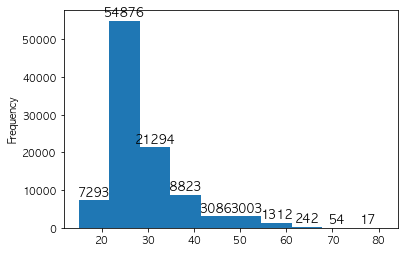

In [70]:
# 데이터가 어떻게 분포되어 있는지 확인하기
# 데이터가 2030에 몰려 있음 (주 사용층 - 2030)

plots = df['age'].plot.hist()
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

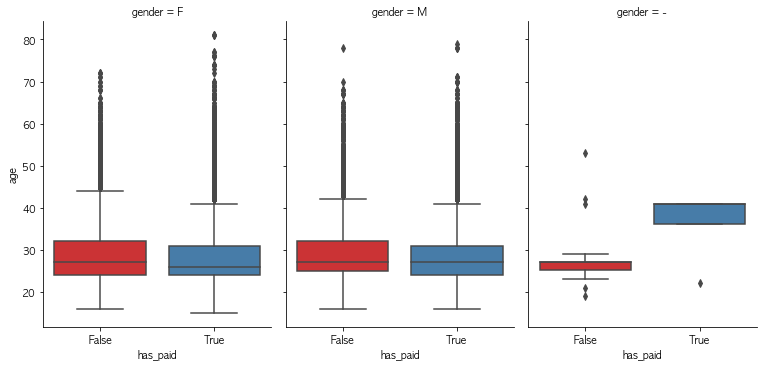

In [65]:
# 나이, 성별에 따른 결제 여부
# 나이나 성별에 따라 결제 여부가 달라지지 않고 분포가 비슷하다. 20대 중반 30대 초반이 많고 40대 중반 이상은 outlier
# 성별 표시가 되지 않은 - 그룹에서는 40대에서 모두 결제가 발생하며 메이저 그룹은 모두 결제 하지않음 (하지만 성별, 나이가 영향끼치지 않으므로 해당변수제외)
g = sns.catplot(x="has_paid", y="age",
                col="gender", palette='Set1',
                data=df, kind="box",
                height=5, aspect=.7);

In [61]:
df.groupby(['has_paid', 'gender']).median()

age    year    refund     fee  income_근로  income_사업  \
has_paid gender                                                         
False    -       27.0  2018.0  192000.0  4300.0        0.0        0.0   
         F       27.0  2019.0  110000.0  4300.0        0.0   127000.0   
         M       27.0  2019.0  110000.0  4300.0        0.0   105000.0   
True     -       41.0  2016.5   78500.0  2350.0        0.0        0.0   
         F       26.0  2018.0   88000.0  1700.0        0.0   403000.0   
         M       27.0  2018.0  101000.0  4300.0        0.0   438000.0   

                 income_기타     income  
has_paid gender                        
False    -             0.0        0.0  
         F             0.0  1056000.0  
         M             0.0  1242000.0  
True     -             0.0        0.0  
         F             0.0  1489000.0  
         M             0.0  1642000.0

In [85]:
boxplot_stats(df[(df['has_paid']==False) & (df['gender']=='F')]['age'])[0]

{'cihi': 27.093321660495,
 'cilo': 26.906678339505,
 'fliers': array([54., 61., 49., ..., 52., 46., 50.]),
 'iqr': 8.0,
 'mean': 29.34078613227338,
 'med': 27.0,
 'q1': 24.0,
 'q3': 32.0,
 'whishi': 44.0,
 'whislo': 16.0}

In [89]:
#boxplot_stats(df.)[0]['whislo']
boxplot_stats(df[(df['has_paid']==False) & (df['gender']=='M')]['age'])[0]['whishi']

42.0

In [90]:
boxplot_stats(df[(df['has_paid']==True) & (df['gender']=='F')]['age'])[0]

{'cihi': 26.06203300056896,
 'cilo': 25.93796699943104,
 'fliers': array([48., 44., 60., ..., 49., 53., 62.]),
 'iqr': 7.0,
 'mean': 29.18482174148533,
 'med': 26.0,
 'q1': 24.0,
 'q3': 31.0,
 'whishi': 41.0,
 'whislo': 15.0}

In [91]:
boxplot_stats(df[(df['has_paid']==True) & (df['gender']=='M')]['age'])[0]

{'cihi': 27.060268281279438,
 'cilo': 26.939731718720562,
 'fliers': array([42., 58., 44., ..., 55., 43., 42.]),
 'iqr': 7.0,
 'mean': 28.57058222061831,
 'med': 27.0,
 'q1': 24.0,
 'q3': 31.0,
 'whishi': 41.0,
 'whislo': 16.0}

In [20]:
df['gender'].value_counts()

M    50477
F    49501
-       22
Name: gender, dtype: int64

In [93]:
boxplot_stats(df['age'])[0]

{'cihi': 27.03475343148525,
 'cilo': 26.96524656851475,
 'fliers': array([54., 42., 48., ..., 50., 45., 62.]),
 'iqr': 7.0,
 'mean': 29.00096,
 'med': 27.0,
 'q1': 24.0,
 'q3': 31.0,
 'whishi': 41.0,
 'whislo': 15.0}

<AxesSubplot:ylabel='Frequency'>

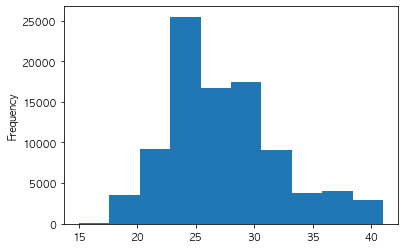

In [8]:
# 41살 이상은 아웃라이어이므로 제거
df_41 = df[df['age'] <= 41]
df_41['age'].plot.hist()

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/lana/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/Users/lana/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


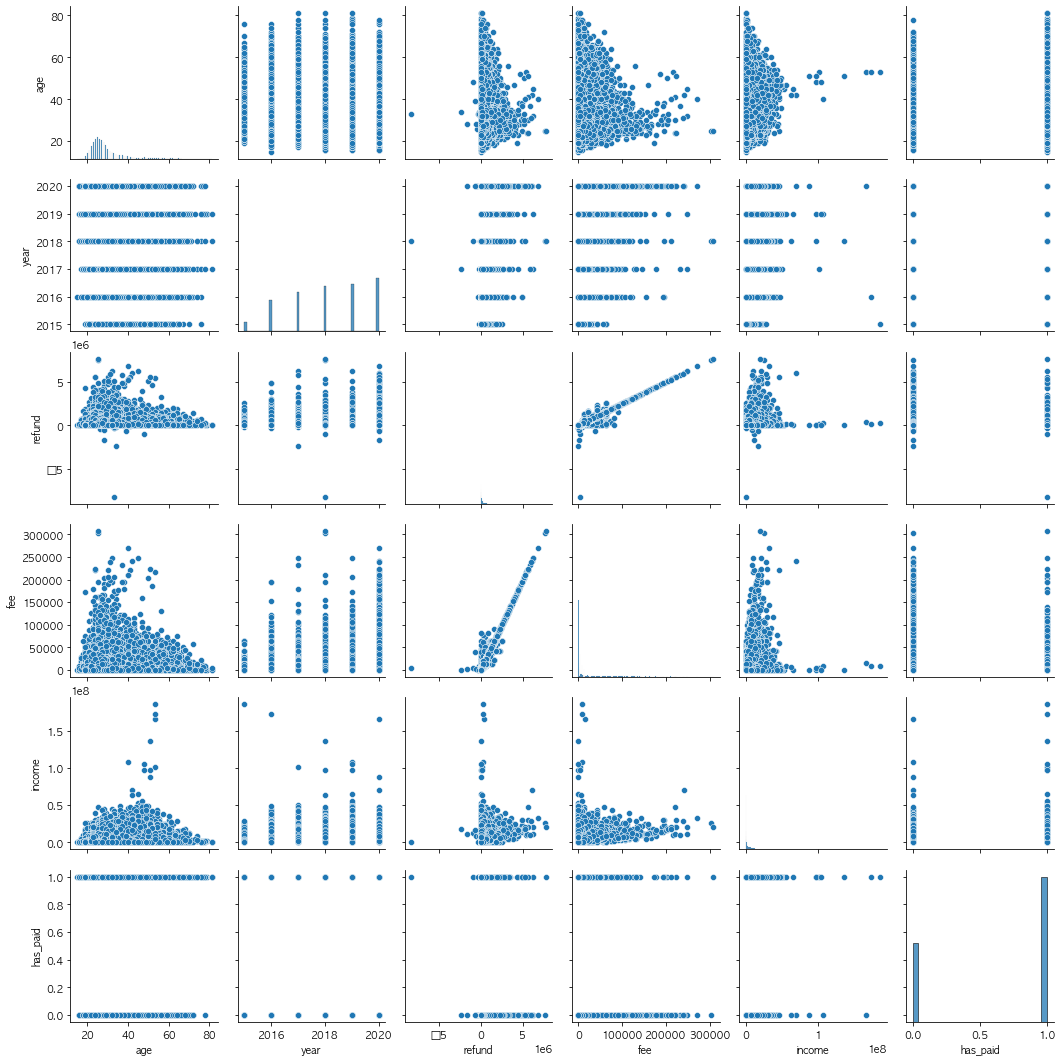

In [68]:
# 상관관계를 갖고 있는 칼럼은 'refund'와 'fee' (환급금액이 크면 수수료도 큰 당연한 사실)
sns.pairplot(df[['age', 'gender', 'year', 'refund', 'fee', 'income', 'has_paid']])

In [10]:
# 환급금액이 < 0 인 사람들
# 이 사람들은 세금을 오히려 내야 한다고 나온 사람들일까? 
# 근데 그러면 True 한 이유는 뭐야?
df[(df['refund']<0) & (df['has_paid'] == True)]

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,income
10034,34.0,M,2015,-231000.0,8500.0,True,8989000.0,1714000.0,0.0,1714000.0
10624,25.0,F,2018,-7000.0,400.0,True,7508000.0,28000.0,0.0,28000.0
29515,41.0,F,2017,-10000.0,400.0,True,19718000.0,162000.0,128000.0,290000.0
54256,48.0,F,2018,-948000.0,3000.0,True,8157000.0,3975000.0,0.0,3975000.0
57756,38.0,F,2017,-107000.0,4300.0,True,16619000.0,737000.0,0.0,737000.0
68881,33.0,M,2016,-322000.0,400.0,True,0.0,57000.0,0.0,57000.0
98352,33.0,M,2018,-8265000.0,4300.0,True,0.0,690000.0,0.0,690000.0


In [15]:
df['fee'].value_counts()

400.0       33955
4300.0      10105
900.0        5906
8500.0       4972
1300.0       4401
            ...  
133100.0        1
128800.0        1
215600.0        1
131000.0        1
122000.0        1
Name: fee, Length: 352, dtype: int64

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/lana/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/Users/lana/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


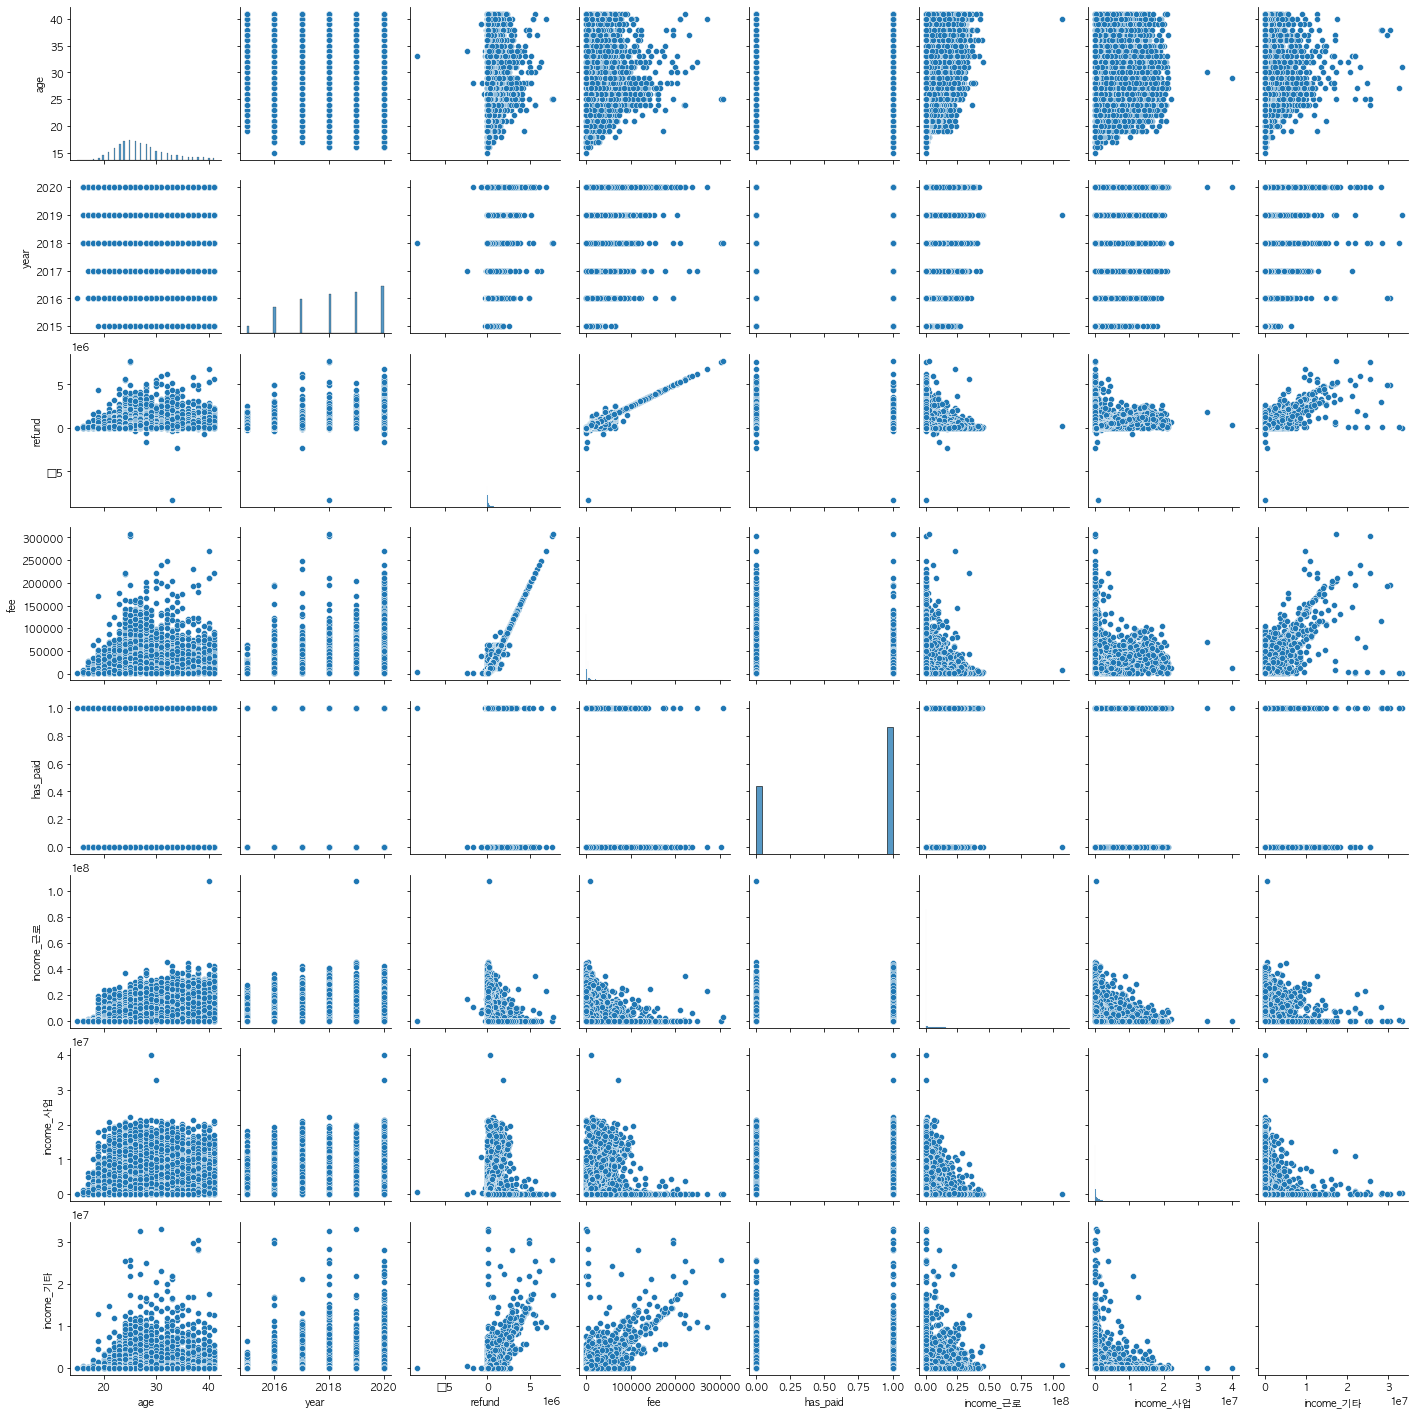

In [7]:
# 전체적으로 불균형이 너무 크기 때문에, outlier을 모두 제거한 데이터로 분석하겠음
sns.pairplot(df_41)

<AxesSubplot:xlabel='age', ylabel='count'>

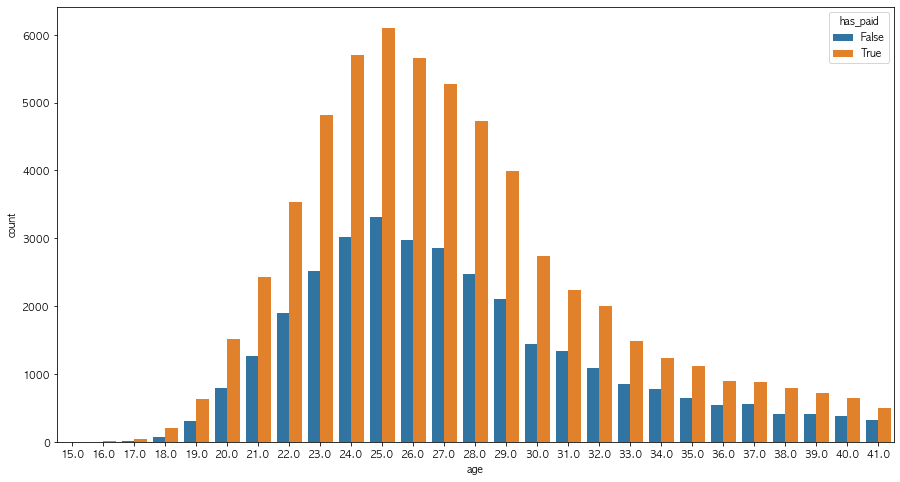

In [23]:
plt.figure(figsize = (15,8))
sns.countplot(x="age", data=df_41, hue="has_paid")

In [16]:
df_41

,age,gender,year,refund,fee,has_paid,income_근로,income_사업,income_기타,income
0,27.0,F,2019,5000.0,400.0,False,10001000.0,61000.0,0.0,61000.0
1,34.0,M,2018,100000.0,1700.0,True,18092000.0,0.0,1815000.0,1815000.0
2,28.0,F,2017,289000.0,11500.0,False,0.0,1461000.0,0.0,1461000.0
3,27.0,M,2019,410000.0,16200.0,False,0.0,2471000.0,0.0,2471000.0
4,26.0,F,2016,114000.0,4300.0,True,0.0,689000.0,0.0,689000.0
...,...,...,...,...,...,...,...,...,...,...
99994,32.0,M,2016,101000.0,3000.0,True,0.0,0.0,0.0,0.0
99995,27.0,F,2019,301000.0,11900.0,True,0.0,0.0,680000.0,680000.0
99997,24.0,M,2020,9000.0,400.0,False,7923000.0,54000.0,0.0,54000.0
99998,24.0,M,2019,34000.0,400.0,True,0.0,204000.0,0.0,204000.0


In [52]:
a = df_41.groupby("age")["has_paid"].value_counts(normalize=True).mul(100)
a

age   has_paid
15.0  True        100.000000
16.0  True         70.000000
      False        30.000000
17.0  True         81.481481
      False        18.518519
18.0  True         73.260073
      False        26.739927
19.0  True         67.375133
      False        32.624867
20.0  True         65.614187
      False        34.385813
21.0  True         65.694219
      False        34.305781
22.0  True         65.037663
      False        34.962337
23.0  True         65.635224
      False        34.364776
24.0  True         65.373580
      False        34.626420
25.0  True         64.840183
      False        35.159817
26.0  True         65.616311
      False        34.383689
27.0  True         64.865863
      False        35.134137
28.0  True         65.640172
      False        34.359828
29.0  True         65.533103
      False        34.466897
30.0  True         65.487572
      False        34.512428
31.0  True         62.629082
      False        37.370918
32.0  True         64.686895

In [79]:
df_age = a.to_frame()
df_age.columns = ['ratio']
df_age = df_age.reset_index()
df_new = df_age[(df_age['has_paid']==True)]
df_new.reset_index(inplace=True, drop=True)

In [91]:
df_new['cnt'] = cnt['fee']
df_new.sort_values(by='ratio', ascending=False)

/Users/lana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,age,has_paid,ratio,cnt
0,15.0,True,100.000000,1
2,17.0,True,81.481481,54
3,18.0,True,73.260073,273
1,16.0,True,70.000000,10
4,19.0,True,67.375133,941
23,38.0,True,65.941423,1195
6,21.0,True,65.694219,3702
13,28.0,True,65.640172,7209
8,23.0,True,65.635224,7336
11,26.0,True,65.616311,8632


In [ ]:
df_age[(df_age['has_paid']==True) & (df_age['ratio'] > 60)].sort_values(by='ratio', ascending=False)

In [87]:
cnt = df_41.groupby('age')['fee'].count()
cnt = cnt.to_frame().reset_index()
cnt

,age,fee
0,15.0,1
1,16.0,10
2,17.0,54
3,18.0,273
4,19.0,941
5,20.0,2312
6,21.0,3702
7,22.0,5443
8,23.0,7336
9,24.0,8713


In [51]:
df_age[(df_age['has_paid']==True) & (41 > df_age['ratio'])].sort_values(by='ratio', ascending=False)

,age,has_paid,ratio
93,62.0,True,69.117647
89,60.0,True,68.750000
81,56.0,True,67.844523
55,43.0,True,67.554859
95,63.0,True,67.500000
7,19.0,True,67.375133
91,61.0,True,67.032967
45,38.0,True,65.941423
11,21.0,True,65.694219
25,28.0,True,65.640172


In [22]:
grouped = df_41.groupby(['age', 'has_paid'])['fee']
grouped.agg(['size'])

size
age  has_paid      
15.0 True         1
16.0 False        3
     True         7
17.0 False       10
     True        44
18.0 False       73
     True       200
19.0 False      307
     True       634
20.0 False      795
     True      1517
21.0 False     1270
     True      2432
22.0 False     1903
     True      3540
23.0 False     2521
     True      4815
24.0 False     3017
     True      5696
25.0 False     3311
     True      6106
26.0 False     2968
     True      5664
27.0 False     2855
     True      5271
28.0 False     2477
     True      4732
29.0 False     2098
     True      3989
30.0 False     1444
     True      2740
31.0 False     1339
     True      2244
32.0 False     1094
     True      2004
33.0 False      853
     True      1487
34.0 False      772
     True      1230
35.0 False      653
     True      1114
36.0 False      542
     True       894
37.0 False      562
     True       883
38.0 False      407
     True       788
39.0 False      417
     True       715
40.0 False      385
     True       646
41.0 False      324
     True       493

In [24]:
df_41.corr()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.151102,0.091946,0.083264,-0.019518,0.320390,0.084765,0.072640
year,-0.151102,1.000000,0.143119,0.171656,-0.138427,0.137663,0.154673,0.037987
refund,0.091946,0.143119,1.000000,0.969586,-0.094814,-0.081713,0.613892,0.510402
fee,0.083264,0.171656,0.969586,1.000000,-0.118982,-0.081562,0.604955,0.534573
has_paid,-0.019518,-0.138427,-0.094814,-0.118982,1.000000,0.042594,-0.015893,-0.049396
income_근로,0.320390,0.137663,-0.081713,-0.081562,0.042594,1.000000,-0.086513,0.092380
income_사업,0.084765,0.154673,0.613892,0.604955,-0.015893,-0.086513,1.000000,-0.052843
income_기타,0.072640,0.037987,0.510402,0.534573,-0.049396,0.092380,-0.052843,1.000000


In [25]:
df.corr()

,age,year,refund,fee,has_paid,income_근로,income_사업,income_기타
age,1.000000,-0.113500,0.078485,0.072135,-0.022918,0.217894,0.069412,0.054130
year,-0.113500,1.000000,0.140977,0.169537,-0.136060,0.124501,0.153693,0.036665
refund,0.078485,0.140977,1.000000,0.969427,-0.094061,-0.079797,0.610592,0.507695
fee,0.072135,0.169537,0.969427,1.000000,-0.117695,-0.079523,0.601112,0.531414
has_paid,-0.022918,-0.136060,-0.094061,-0.117695,1.000000,0.048247,-0.014917,-0.044802
income_근로,0.217894,0.124501,-0.079797,-0.079523,0.048247,1.000000,-0.086807,0.098044
income_사업,0.069412,0.153693,0.610592,0.601112,-0.014917,-0.086807,1.000000,-0.049067
income_기타,0.054130,0.036665,0.507695,0.531414,-0.044802,0.098044,-0.049067,1.000000


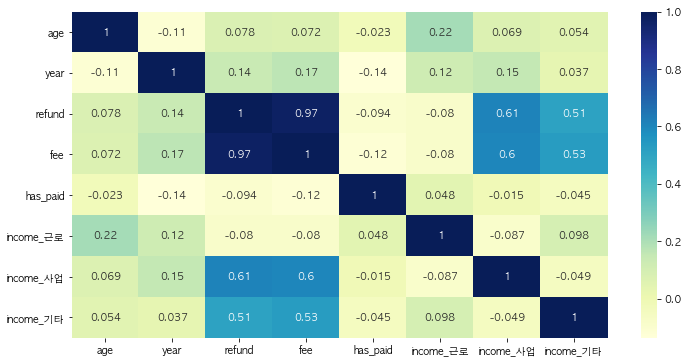

In [26]:
corr = df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

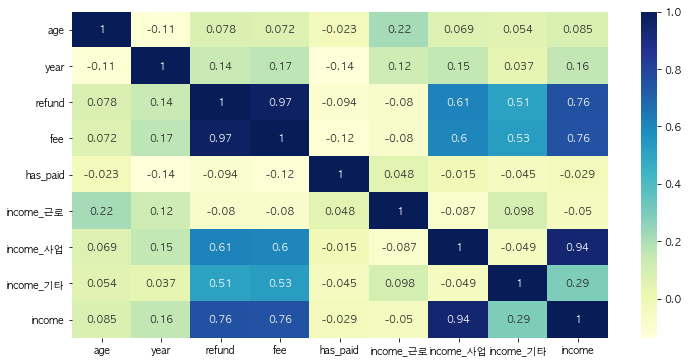

In [33]:
df['income'] = df['income_사업'] + df['income_기타']
corr = df.corr()
plt.figure(figsize = (12,6))
sns.heatmap(corr, annot=True, cmap='YlGnBu');

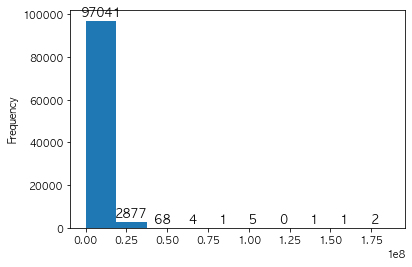

In [76]:
plots = df['income'].plot.hist()
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

In [50]:
x_data = df[['refund', 'fee','income']]
y_data = df[['has_paid']]

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

In [47]:
x_train.shape, x_test.shape

((70000, 4), (30000, 4))

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

/Users/lana/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7295553900110167
0.036545890724720476
